<a href="https://colab.research.google.com/github/CharmikaSadhula/Charmika_INFO5731_Spring2025/blob/main/INFO5731_Assignment_5_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"charmikasadhula","key":"d14357ab02627414ddd3075144d76ea8"}'}

In [4]:
!mv "kaggle (1).json" kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment
!unzip twitter-airline-sentiment.zip


Dataset URL: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
License(s): CC-BY-NC-SA-4.0
Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


Initially, I used the Sentiment140 dataset for the assignment on sentiment analysis, only to find later that it has fewer neutral tweets, which sabotage the three-class sentiment classification. Hence, I decided to shift development towards the Kaggle dataset for Twitter US Airline Sentiment, which has positive, negative, and neutral labelled tweets. This dataset fits very well into my particular work because it lets me build and evaluate models that would work in differentiating all three sentiment types. I used the Kaggle API to download the dataset directly into Google Colab. I uploaded the kaggle.json file for authentication, then ran the download command which made the compressed file twitter-airline-sentiment.zip available. Thereafter, when extracted, it produced two files: Tweets.csv, for tweet data, and database.sqlite, which is the same set in the format of a SQLite database. For this assignment, I'm going to deal with the file Tweets.csv because it is simple to import it and use it through pandas. Having it in csv format opens the door to cleaning the text data and doing exploratory analysis in much less time in the upcomin

In [11]:
import pandas as pd

# I'm loading the Twitter Airline Sentiment dataset from the CSV file
df = pd.read_csv('Tweets.csv')

# I only need the sentiment and the tweet text, so I'm selecting just those
df = df[['airline_sentiment', 'text']]

# Renaming the columns to 'sentiment' and 'text' for simplicity
df.columns = ['sentiment', 'text']

# Checking the first few rows to make sure everything looks good
df.head()


,sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


Class Distribution:
 sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


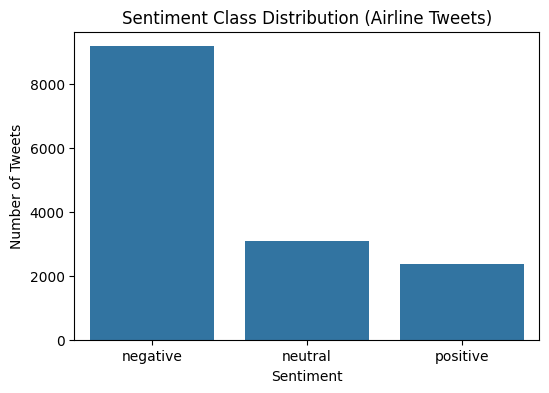

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tweets for each sentiment
class_counts = df['sentiment'].value_counts()

# Print the counts
print("Class Distribution:\n", class_counts)

# Plot the class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Sentiment Class Distribution (Airline Tweets)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


I then moved to the Twitter Airline Sentiment dataset and checked the distribution of the sentiment labels by counting how many tweets fell into the positive, neutral, or negative classes. Next, I presented a plot to visually discern data balance. This step assists in analyzing any over-or under-representation of a class, which is critical since imbalanced datasets influence model performance in machine learning. For instance, if the greater part of the texts happens to be recognized as negative, the model would likely learn the tendency of guessing always "negative", which would not be helpful. This informs me of whether to apply any balancing techniques before training.

EXPLORATORY DATA ANALYSIS

In [13]:
# Checking for missing values
print(df.isnull().sum())

# Dataset shape and basic info
print("Dataset shape:", df.shape)
df.info()


sentiment    0
text         0
dtype: int64
Dataset shape: (14640, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14640 non-null  object
 1   text       14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


TEXT PREPROCESSING

In [17]:
!pip install nltk

In [21]:
!pip install -U spacy

# Download English language model
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Preprocessing using spaCy
def preprocess_spacy(text):
    doc = nlp(text.lower())  # Convert to lowercase and process with spaCy
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return ' '.join(tokens)

# Apply to your dataset
df['clean_text'] = df['text'].apply(preprocess_spacy)

# Show cleaned tweets
df[['text', 'clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,say
1,@VirginAmerica plus you've added commercials t...,plus add commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,today mean need trip
3,@VirginAmerica it's really aggressive to blast...,aggressive blast obnoxious entertainment guest...
4,@VirginAmerica and it's a really big bad thing...,big bad thing


Because I was facing nonstop errors with NLTK while trying to tokenize and lemmatize tweets, I switched to spatium which is another quite modernized and efficient NLP library. Unlike NLTK, it does not require downloading a bunch of scattered packages and works directly from the install of the English model. I authored a new preprocessing function using spaCy that will convert all tweets to lowercase, will delete stopwords, punctuation, and numbers, and lemmatize them into their root form. This helps retain only the meaningful words in the tweets thus easing the model learning during training.

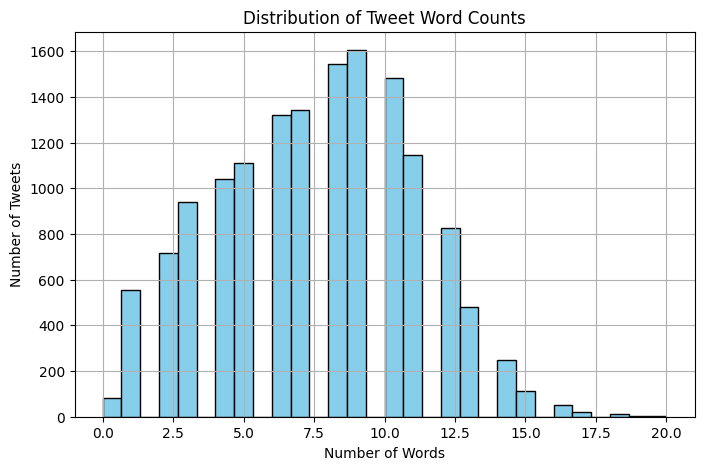

In [23]:
import matplotlib.pyplot as plt

# Calculate the number of words in each cleaned tweet
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

# Plotting the sentence (word count) distribution
plt.figure(figsize=(8,5))
plt.hist(df['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Tweet Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.show()


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

